# XGBOOST Classifier

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance. Below are the 2 aspect based on which Xgboost runs 

1. Execution Speed.
2. Model Performance.


In [1]:
pwd

'C:\\Users\\User\\Git-Hup Files\\Machine Learning Classification'

In [2]:
cd C:\Users\User\Desktop\Anindita Mitra\Machine Learning\Email Marketing

C:\Users\User\Desktop\Anindita Mitra\Machine Learning\Email Marketing


In [3]:
#Import all the library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# import Data set from the local directory
df = pd.read_csv("EmailClassification.csv")

In [5]:
df.head(10)

,Email_ID,Month,Email_Sent,Open_Rate,Click_Rate,Conversion_Rate
0,EMA00081000168000,Jan,873,42,14,0
1,EMA00081000187610,Feb,630,32,26,1
2,EMA00081000244770,Mar,988,21,8,0
3,EMA00081000245260,Apr,339,25,9,0
4,EMA00081000264690,May,1157,30,31,1
5,EMA00081000337110,Jun,1157,25,31,1
6,EMA00081000390580,Jul,962,78,27,0
7,EMA00081000445960,Jan,578,17,11,0
8,EMA00081000581770,Feb,1173,33,21,1
9,EMA00081000587870,Mar,1173,23,2,0


In [6]:
#defining X and Y
x = df.iloc[:,2:-1]
y= df.iloc[:, -1]

In [7]:
x.head(10)

,Email_Sent,Open_Rate,Click_Rate
0,873,42,14
1,630,32,26
2,988,21,8
3,339,25,9
4,1157,30,31
5,1157,25,31
6,962,78,27
7,578,17,11
8,1173,33,21
9,1173,23,2


In [8]:
y.head(10)

0    0
1    1
2    0
3    0
4    1
5    1
6    0
7    0
8    1
9    0
Name: Conversion_Rate, dtype: int64

In [9]:
# Splitting data into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x , y, test_size=0.2, random_state=0)

In [10]:
# Traning with XG Boost
from xgboost import XGBClassifier
Classifier = XGBClassifier()
Classifier.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [11]:
y_pred = Classifier.predict(x_test)

In [12]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score

[[27  3]
 [ 2  8]]


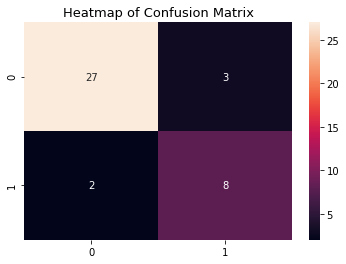

In [13]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.title('Heatmap of Confusion Matrix', fontsize=13)
sns.heatmap(cm, annot=True)
plt.show()

In [14]:
#Prediction and Evaluation
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        30
           1       0.73      0.80      0.76        10

    accuracy                           0.88        40
   macro avg       0.83      0.85      0.84        40
weighted avg       0.88      0.88      0.88        40



In [15]:
#Accuracy
accuracy_score(y_test, y_pred)

0.875

In [16]:
#Cross-Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = Classifier, X = x_train, y = y_train, cv = 10)
print("accuracies: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

accuracies: 91.21 %
Standard Deviation: 4.98 %
